#  Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Какие шаги будем предпринимать после предобработки:
Изучить параметры объекта.
Построить и описать гистограммы для каждого параметра.
Проверить время продажи квартиры по столбцу days_exposition. Построить гистограмму для визуализации.
Проверить, какие параметры влияют на общую стоимость объекта. Построить графики, можно отобразить в сводной таблице.
Определить среднюю цену кв.м. в населенных пунктах с наибольшим числом объявлений.
Выделить нас.пункты с самой высокой стоимостью кв.м. и с самой низкой стоимостью кв.м.
Определить,как стоимость объектов зависит от расстояния до центра города.
Написать общий вывод.

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# импорт библиотек
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# открываем файл
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# посмотрим общую информацию и выведем 10 строк таблицы
data.info()
pd.set_option('display.max_columns', None)
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


`Первичный вывод по общей инфо и визуальному осмотру таблицы`
1. таблица с 22 столбцами и 23699 записями
2. столбцы переименовать не нужно, записаны правильно(cityCenters_nearest можно оставить пока так)
3. в столбце first_day_exposition тип значения object, должен быть-datetime(день и месяц публикации объявления)
4. в столбце ceiling_height есть нулевые значения + замечены аномальные значения(1,100,..)
3. в столбце floors_total тип значения float64, должен быть-int(ведь число этажей-это целое значение) + имеются нулевые значения
4. в столбце living_area есть нулевые значения
5. в столбце is_apartment тип значения object, должен быть-bool(да/нет) + имеются нулевые значения
6. в столбце kitchen_area есть нулевые значения
7. в столбце balcony есть нулевые значения
8. в столбце locality_name есть нулевые значения
9. в столбце airports_nearest есть нулевые значения
10. в столбце cityCenters_nearest есть нулевые значения, изменим тип данных на int и переведем в м. 
11. в столбце parks_around3000 тип значения float64, должен быть-int(ведь число парков-это целое значение) + имеются нулевые значения
12. в столбце ponds_around3000 должен быть-int(ведь число прудов-это целое значение) + имеются нулевые значения
13. в столбце days_exposition - тип должен быть int(количество дней публикации) + имеются нулевые значения
14. столбец last_price тип значения float64, но можно привести к целому числу int

In [3]:
# краткая информация о датасете
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
# проверим количество пропусков в датасете
print((data.isna().sum()))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


`Пропусков много. Возможно, продавец сам не указал данные. Позже будем избавляться от пробелов`

In [5]:
# определим количество явных дубликатов
print('Количество дубликатов', data.duplicated().sum())

Количество дубликатов 0


`Дубликатов нет`

In [6]:
# доп. проверки по количеству значений(пока без вывода)
#data['ceiling_height'].value_counts()
#data['floor'].value_counts()
#data['is_apartment'].value_counts()
#data['total_area'].value_counts()
#data['rooms'].value_counts()
#data['airports_nearest'].value_counts()
#data['cityCenters_nearest'].value_counts()
#data['parks_around3000'].value_counts()
#data['parks_nearest'].value_counts()
#data['ponds_around3000'].value_counts()

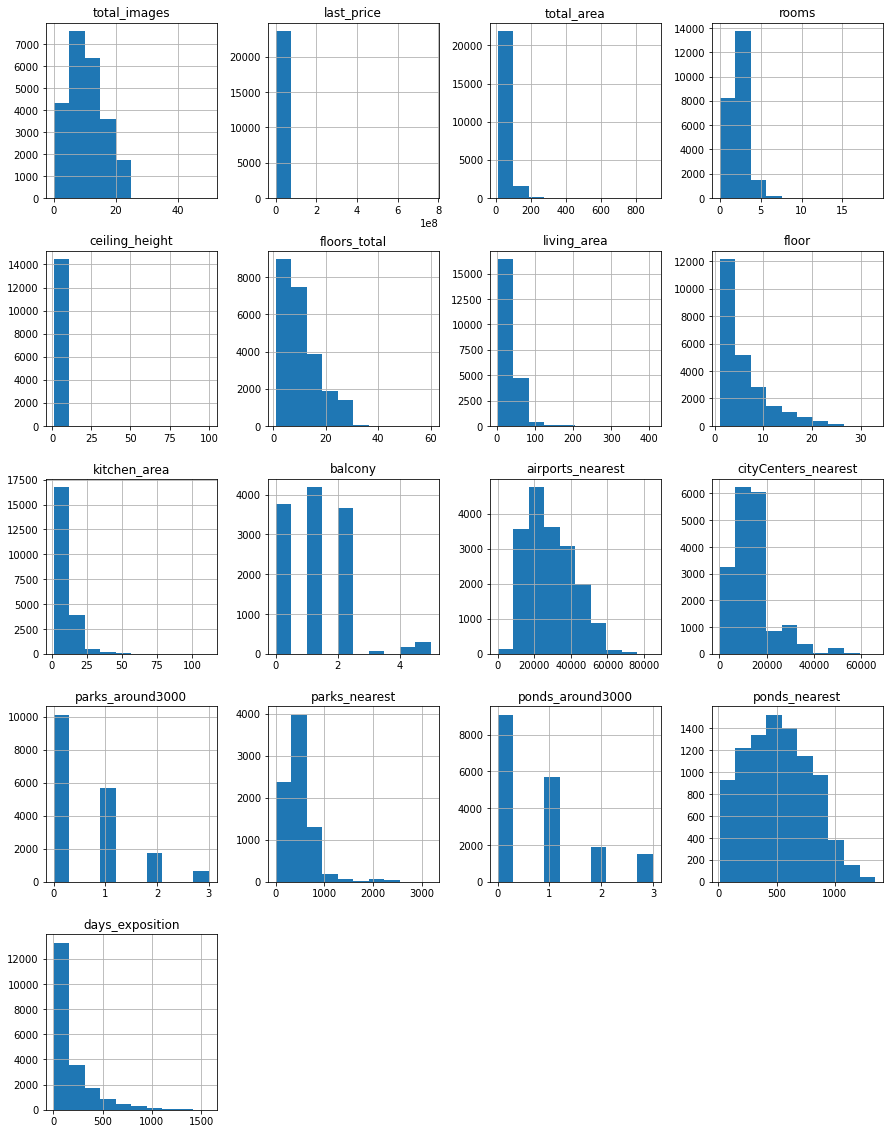

In [7]:
data.hist(figsize=(15, 20));

### Предобработка данных

`На основе первичного вывода и по ходу анализа будем подправлять данные в таблице.`

In [8]:
# Столбец "first_day_exposition" преобразуем в datetime(год-месяц-день)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data.head(10) # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [9]:
# Раз уж начали со времени, то сразу посмотрим и на столбец с продолжительностью публикации объявления о продаже.
print(data['days_exposition'].value_counts().head(20))
# Как видно выше, в таблице в days_exposition 3181 пропуск. Если стоит пропуск,значит, квартира не продана.
# Оставляем данный столбец,как есть.

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
8.0     139
20.0    139
44.0    138
11.0    135
18.0    129
13.0    128
10.0    127
28.0    126
15.0    126
22.0    125
Name: days_exposition, dtype: int64


In [10]:
# Исправляем столбец ceiling_height(высота потолков), определим кол-во пропусков 
print('# Кол-во пропусков:', data.ceiling_height.isna().sum())
# Посмотрим уникальные значения столбца с высотой потолков, что там не так
print('Визуально сравним данные о высоте потолков', set(data['ceiling_height'].unique()))

# Кол-во пропусков: 9195
Визуально сравним данные о высоте потолков {nan, 1.2, 2.66, 2.5, 2.7, 3.03, 2.67, 2.56, 3.05, 2.75, 2.6, 2.9, 3.0, 4.15, 5.0, 2.0, 3.25, 3.5, 3.75, 14.0, 20.0, 4.0, 4.5, 4.25, 24.0, 25.0, 26.0, 27.0, 5.5, 22.6, 27.5, 1.75, 32.0, 6.0, 1.0, 8.0, 2.61, 2.68, 2.93, 2.86, 3.11, 3.18, 3.86, 3.36, 3.68, 3.43, 3.93, 2.25, 2.79, 2.54, 3.54, 3.04, 3.29, 100.0, 2.4, 2.65, 2.47, 2.72, 2.97, 3.4, 3.15, 3.65, 3.9, 3.22, 3.47, 2.51, 2.76, 2.58, 2.83, 3.01, 3.83, 3.08, 3.26, 3.33, 4.4, 4.65, 3.51, 3.76, 3.58, 4.9, 2.94, 2.69, 3.44, 3.69, 2.8, 2.55, 2.87, 2.3, 2.62, 3.3, 3.8, 3.55, 3.62, 3.12, 3.87, 4.19, 4.8, 3.37, 4.37, 5.3, 4.3, 5.8, 2.73, 2.48, 2.98, 3.98, 3.23, 3.48, 2.84, 2.34, 2.59, 2.91, 3.16, 3.66, 3.09, 3.34, 3.84, 3.59, 8.3, 2.77, 2.52, 3.52, 3.27, 3.02, 10.3, 2.95, 2.45, 2.63, 2.88, 2.2, 3.38, 3.2, 3.45, 3.7, 3.13, 4.06, 4.7, 3.95, 4.2, 3.63, 5.2, 4.45, 2.81, 3.06, 3.31, 3.56, 2.92, 2.74, 2.99, 2.49, 3.67, 3.24, 3.17, 3.42, 3.49, 4.1, 5.6, 3.88, 2.85, 2.78, 2.53, 3.

In [11]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

`Потолки в квартирах могут быть от 2 до 4 м, но не 1 м, не 20 м и тем более не 100 м`

In [12]:
# Проверим количество квартир с потолками больше 4 м.
print('Количество квартир с потолками выше 4 м:',
        len(data[data['ceiling_height'] > 4].sort_values('ceiling_height')))
# Проверим строки, по которым узнаем о данных квартирах
data.query('ceiling_height > 4')

Количество квартир с потолками выше 4 м: 75


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06,3,4.15,3.0,44.2,2,NaN,False,False,12.2,NaN,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
355,17,3600000.0,55.2,2018-07-12,2,25.00,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.5,7,NaN,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3.0,190.0,3,NaN,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01,1,5.00,3.0,NaN,1,False,False,False,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,20,5300000.0,45.0,2017-09-30,1,10.30,16.0,15.5,15,NaN,False,False,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22336,19,9999000.0,92.4,2019-04-05,2,32.00,6.0,55.5,5,False,False,False,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
22494,7,91075000.0,491.0,2017-05-27,5,4.20,9.0,274.0,9,NaN,False,False,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0
22869,0,15000000.0,25.0,2018-07-25,1,100.00,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


`Выборка показала 75 вариантов квартир с потолками больше 4м. Конечно, здесь можно учесть элитную недвижимость с несколькими этажами, но все-равно более 4 м. высота уже аномально высока. Вероятно, здесь проекраслась и опечатка, такакя как 27 это 2.7. Поработаем со всеми аномалиями позже.`

In [13]:
# Столбцы locality_name и floors_total 
# Удаляем записи, где отсутствует локация и этажность
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [14]:
# Заменим пропуски высоты потолков на медианное значение по всему датасету
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data['ceiling_height'].describe()


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

count    23565.000000
mean         2.737873
std          1.009172
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [15]:
# Переходим к столбцам living_area и kitchen_area.
# Заменяем пустые значения жилой площади и площади кухни на медианные значения
data['living_area'].fillna(data['living_area'].median(), inplace=True)
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)
# Приведем к целочисленному типу данных
data['kitchen_area'] = data['kitchen_area'].astype(int)
data['living_area'] = data['living_area'].astype(int)
# Проверим результат
data['kitchen_area'].head(20)
data['living_area'].head(20)

0     51
1     18
2     34
3     30
4     32
5     14
6     10
7     30
8     15
9     43
10    20
11    31
12    30
13    27
14    17
15    20
16    55
17    16
18    19
19    76
Name: living_area, dtype: int64

In [17]:
# Заменяем пропущенные значения в аппартаменты на False(нет)
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51,8,False,False,False,25,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.60,5,34,4,False,False,False,8,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,30,9,False,False,False,9,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32,13,False,False,False,41,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73,3,False,False,False,13,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5,38,4,False,False,False,8,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29,1,False,False,False,9,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30,12,False,False,False,23,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [18]:
# Приводим в целочисленный тип int количество парков,сразу заменяем пропущенные значения на 0.
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51,8,False,False,False,25,NaN,Санкт-Петербург,18863.0,16028.0,1,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.60,5,34,4,False,False,False,8,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,30,9,False,False,False,9,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32,13,False,False,False,41,NaN,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73,3,False,False,False,13,NaN,Санкт-Петербург,24665.0,4232.0,1,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5,38,4,False,False,False,8,NaN,Тосно,NaN,NaN,0,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29,1,False,False,False,9,NaN,село Рождествено,NaN,NaN,0,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30,12,False,False,False,23,2.0,Санкт-Петербург,39140.0,10364.0,2,173.0,3.0,196.0,602.0


In [19]:
# Приводим в целочисленный тип кол-во прудов, сразу заменяем пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51,8,False,False,False,25,NaN,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.60,5,34,4,False,False,False,8,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,30,9,False,False,False,9,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32,13,False,False,False,41,NaN,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73,3,False,False,False,13,NaN,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5,38,4,False,False,False,8,NaN,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29,1,False,False,False,9,NaN,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30,12,False,False,False,23,2.0,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


In [20]:
# Столбец parks_nearest (расстояние до парка) с картографическими данными, поэтому пропуски не трогаем. 
# Иначе анализ будет не верным. Переведем данные в метры.
data['parks_nearest'] = data['parks_nearest']*1000
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51,8,False,False,False,25,NaN,Санкт-Петербург,18863.0,16028.0,1,482000.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.60,5,34,4,False,False,False,8,0.0,Санкт-Петербург,21741.0,13933.0,1,90000.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,30,9,False,False,False,9,0.0,Санкт-Петербург,28098.0,6800.0,2,84000.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32,13,False,False,False,41,NaN,Санкт-Петербург,31856.0,8098.0,2,112000.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73,3,False,False,False,13,NaN,Санкт-Петербург,24665.0,4232.0,1,796000.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5,38,4,False,False,False,8,NaN,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29,1,False,False,False,9,NaN,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30,12,False,False,False,23,2.0,Санкт-Петербург,39140.0,10364.0,2,173000.0,3,196.0,602.0


In [21]:
# Столбец ponds_nearest (расстояние до пруда) с картографическими данными, поэтому пропуски не трогаем. 
# Иначе анализ будет не верным. Переведем данные в метры.
data['ponds_nearest'] = data['ponds_nearest']*1000
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51,8,False,False,False,25,NaN,Санкт-Петербург,18863.0,16028.0,1,482000.0,2,755000.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.60,5,34,4,False,False,False,8,0.0,Санкт-Петербург,21741.0,13933.0,1,90000.0,2,574000.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,30,9,False,False,False,9,0.0,Санкт-Петербург,28098.0,6800.0,2,84000.0,3,234000.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32,13,False,False,False,41,NaN,Санкт-Петербург,31856.0,8098.0,2,112000.0,1,48000.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73,3,False,False,False,13,NaN,Санкт-Петербург,24665.0,4232.0,1,796000.0,3,381000.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5,38,4,False,False,False,8,NaN,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29,1,False,False,False,9,NaN,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30,12,False,False,False,23,2.0,Санкт-Петербург,39140.0,10364.0,2,173000.0,3,196000.0,602.0


In [22]:
# Приводим в целочисленный тип количество балконов и сразу заменяем пропущенные значения на 0. 
# Если продавец не указал наличие балкона, будем думать,что его нет.
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,18863.0,16028.0,1,482000.0,2,755000.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.60,5,34,4,False,False,False,8,0,Санкт-Петербург,21741.0,13933.0,1,90000.0,2,574000.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,30,9,False,False,False,9,0,Санкт-Петербург,28098.0,6800.0,2,84000.0,3,234000.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2,112000.0,1,48000.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73,3,False,False,False,13,0,Санкт-Петербург,24665.0,4232.0,1,796000.0,3,381000.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5,38,4,False,False,False,8,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29,1,False,False,False,9,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30,12,False,False,False,23,2,Санкт-Петербург,39140.0,10364.0,2,173000.0,3,196000.0,602.0


In [23]:
# Сиробец last_price. Приводим в целочисленный тип int стоимость квартиры и запрашиваем краткую инфо по столбцу.
data['last_price'] = data['last_price'].astype(int)
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [24]:
# Проверим, что там за квартира меньше 100 тыс.руб.
display(data.loc[(data['last_price']<100000)])
# Итак, в выборке квартира стоимостью 12190 руб. в Санкт-Петербурге. Цена аномально низкая. Скорее всего здесь должно быть тыс.ру.
# Цену исправим вручную, добавим 000
data.loc[8793, 'last_price'] = 12190000
data['last_price'].describe()
 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32,25,False,False,False,40,0,Санкт-Петербург,36421.0,9176.0,1,805000.0,0,NaN,8.0


count    2.356500e+04
mean     6.540575e+06
std      1.091091e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.647000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [25]:
# Приведем площади к целочисленному значению,чтобы легче было считать
# Приводим в целочисленный тип int общую площадь
data['total_area']=data['total_area'].astype(int)
# Посмотрим краткую инфо по столбцу.
data['total_area'].describe()
data.query('total_area == 900')
data.query('total_area == 12')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000,12,2017-07-19,1,2.55,5,10,2,False,False,False,9,0,Санкт-Петербург,21314.0,964.0,1,886000.0,2,45000.0,200.0


`Видим, что мин. общая площадь 12 кв.м., максим.- 900 кв.м. Выборка показала, что квартиры соответствуют размерам и количеству комнат. Все нормально, аномальных значений нет.`

In [26]:
# Приводим в целочисленный тип int жилую площадь
data['living_area']=data['living_area'].astype(int)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,18863.0,16028.0,1,482000.0,2,755000.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.60,5,34,4,False,False,False,8,0,Санкт-Петербург,21741.0,13933.0,1,90000.0,2,574000.0,558.0
3,0,64900000,159,2015-07-24,3,2.60,14,30,9,False,False,False,9,0,Санкт-Петербург,28098.0,6800.0,2,84000.0,3,234000.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2,112000.0,1,48000.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21,3,3.70,5,73,3,False,False,False,13,0,Санкт-Петербург,24665.0,4232.0,1,796000.0,3,381000.0,NaN
23695,14,3100000,59,2018-01-15,3,2.50,5,38,4,False,False,False,8,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000,56,2018-02-11,2,2.65,3,29,1,False,False,False,9,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000,76,2017-03-28,2,3.00,17,30,12,False,False,False,23,2,Санкт-Петербург,39140.0,10364.0,2,173000.0,3,196000.0,602.0


In [27]:
# Проверим уникальные значения названий населенных пунктов.
#print('Названия насел.пунктов', set(data['locality_name'].unique()))
print(data['locality_name'].value_counts().head(20))

Санкт-Петербург            15651
посёлок Мурино               520
посёлок Шушары               439
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
Кудрово                      171
деревня Новое Девяткино      143
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Name: locality_name, dtype: int64


In [28]:
# В столбце locality_name есть аномальные значения, приведем в порядок столбец.
# Так как поселок и посёлок - это одно и то же, нужно заменить ё на е методом replace
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
# Однотипные значения 'поселок городского типа', 'поселок', 'городской поселок' заменим на 'поселок'
data.locality_name = data.locality_name.str.replace('поселок городского типа', 'поселок')
data.locality_name = data.locality_name.str.replace('городской поселок', 'поселок')
# проверим уникальные значения столбца
#print(set(data['locality_name'].unique()))
print(data['locality_name'].value_counts().head(50))

Санкт-Петербург            15651
поселок Мурино               552
поселок Шушары               439
Всеволожск                   398
Пушкин                       369
Колпино                      338
поселок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
Кудрово                      171
деревня Новое Девяткино      143
Сертолово                    142
Ломоносов                    133
Кириши                       125
поселок Бугры                113
Сланцы                       112
Волхов                       111
Кингисепп                    104
Тосно                        104
Кронштадт                     96
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
поселок Янино-1               68
поселок Ме

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

In [29]:
# Проверим в виде множества методом unique значения имеющихся данных по кол-ву комнат
print('Количество комнат в квартирах:', set(data['rooms'].unique()))
# В столбце есть значение 0. Заменим 0 на 1, т.к. в квартире хоть одна комната да есть.
data['rooms'].replace({0:1})
data['rooms'].describe()
# Максим. кол-во комнат - 19, это что-то очень много. Надо проверить площадь квартир с комнатами от 10.
data.query('rooms >= 10')
# Выборка показала,что в Санкт-Петербурге есть такая квартира с общей площадью 374 кв.м. с 19 комнатами. 
# Получается,что каждая комната приблизительно по 19 кв.м.,что вполне нормально. Не будем считать значение аномальным.
data['rooms'].unique()

Количество комнат в квартирах: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19}


array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

`Выборка показала,что в Санкт-Петербурге есть квартиры с большими площадями, например. строка 14498 показала квартиру 374 кв.м. с 19 комнатами. Получается,что каждая комната приблизительно по 19 кв.м.,что вполне нормально. Аналогично и с другими квартирами с большим числом комнат. Не будем считать значения аномальными.`

In [30]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [31]:
data.airports_nearest.head(30)

0     18863.0
1     12817.0
2     21741.0
3     28098.0
4     31856.0
5         NaN
6     52996.0
7     23982.0
8         NaN
9     50898.0
10    38357.0
11    48252.0
12        NaN
13    37868.0
14    20782.0
15    12900.0
16    22108.0
17    33564.0
18    44060.0
19    38900.0
20    53134.0
21    36064.0
22        NaN
23    15414.0
24    20052.0
25    34967.0
26    11580.0
27    29197.0
28    18557.0
29    30394.0
Name: airports_nearest, dtype: float64

In [32]:
# Столбец airports_nearest (расстояние до аэропорта) с картографическими данными, поэтому пропуски не трогаем. 
# Иначе анализ будет не верным. Переведем данные в метры.
data['airports_nearest']=data['airports_nearest']*1000
data['airports_nearest'].head(10)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.60,5,34,4,False,False,False,8,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,558.0
3,0,64900000,159,2015-07-24,3,2.60,14,30,9,False,False,False,9,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21,3,3.70,5,73,3,False,False,False,13,0,Санкт-Петербург,24665000.0,4232.0,1,796000.0,3,381000.0,NaN
23695,14,3100000,59,2018-01-15,3,2.50,5,38,4,False,False,False,8,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000,56,2018-02-11,2,2.65,3,29,1,False,False,False,9,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000,76,2017-03-28,2,3.00,17,30,12,False,False,False,23,2,Санкт-Петербург,39140000.0,10364.0,2,173000.0,3,196000.0,602.0


In [33]:
# Столбец cityCenters_nearest (расстояние до центра города) с картографическими данными, поэтому пропуски не трогаем. 
# Иначе анализ будет не верным. Переведем данные в метры.
data.cityCenters_nearest.head(50)
data['cityCenters_nearest']*1000
data['cityCenters_nearest']
data                             

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.60,5,34,4,False,False,False,8,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,558.0
3,0,64900000,159,2015-07-24,3,2.60,14,30,9,False,False,False,9,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21,3,3.70,5,73,3,False,False,False,13,0,Санкт-Петербург,24665000.0,4232.0,1,796000.0,3,381000.0,NaN
23695,14,3100000,59,2018-01-15,3,2.50,5,38,4,False,False,False,8,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000,56,2018-02-11,2,2.65,3,29,1,False,False,False,9,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000,76,2017-03-28,2,3.00,17,30,12,False,False,False,23,2,Санкт-Петербург,39140000.0,10364.0,2,173000.0,3,196000.0,602.0


In [34]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [35]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.60,5,34,4,False,False,False,8,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,558.0
3,0,64900000,159,2015-07-24,3,2.60,14,30,9,False,False,False,9,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21,3,3.70,5,73,3,False,False,False,13,0,Санкт-Петербург,24665000.0,4232.0,1,796000.0,3,381000.0,NaN
23695,14,3100000,59,2018-01-15,3,2.50,5,38,4,False,False,False,8,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000,56,2018-02-11,2,2.65,3,29,1,False,False,False,9,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000,76,2017-03-28,2,3.00,17,30,12,False,False,False,23,2,Санкт-Петербург,39140000.0,10364.0,2,173000.0,3,196000.0,602.0


`Немного почистили таблицу. Теперь нужно добавить новые столбцы`

In [36]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(data_new, column):
    q1 = data_new[column].quantile(0.25)
    q3 = data_new[column].quantile(0.75)
    iqr = q3 - q1
    data_newq = data.loc[(data_new[column] < q3 + 1.5*iqr) & (data_new[column] > q1 - 1.5*iqr), column]
    return data_newq


In [37]:
# Создадим список с параметрами выброса, над которыми надо потрудится.
list_selected_parameters = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for row in list_selected_parameters:
    data[row] = quartile_range(data, row)

In [38]:
# Возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

In [39]:
#код ревьюера
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.151800e+04,22265.000000,23565.000000,21837.000000,23565.000000,22673.000000,23565.000000,21801.000000,23565.000000,1.804100e+04,18064.000000,23565.000000,8.030000e+03,23565.000000,9.036000e+03,18721.000000
mean,9.878421,4.837339e+06,53.926836,2.013495,2.659333,10.675875,30.953204,5.878124,9.002110,0.593677,2.879708e+07,14192.656056,0.468831,4.905804e+05,0.589900,5.182895e+05,128.299343
std,5.681156,2.215581e+06,19.110798,0.986750,0.143003,6.594823,12.987830,4.871485,2.662394,0.960660,1.263250e+07,8613.348153,0.748403,3.415730e+05,0.883966,2.780096e+05,121.064671
min,0.000000,4.300000e+05,12.000000,0.000000,2.250000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000e+00,181.000000,0.000000,1.000000e+03,0.000000,1.300000e+04,1.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,1.856500e+07,9238.000000,0.000000,2.880000e+05,0.000000,2.930000e+05,41.000000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.640000,9.000000,30.000000,4.000000,9.000000,0.000000,2.675700e+07,13096.500000,0.000000,4.550000e+05,0.000000,5.030000e+05,85.000000
75%,14.000000,6.000000e+06,65.000000,3.000000,2.750000,16.000000,39.000000,8.000000,10.000000,1.000000,3.727300e+07,16285.000000,1.000000,6.120000e+05,1.000000,7.300000e+05,182.000000
max,50.000000,1.186686e+07,112.000000,5.000000,3.050000,60.000000,73.000000,33.000000,16.000000,5.000000,8.486900e+07,65968.000000,3.000000,3.190000e+06,3.000000,1.344000e+06,509.000000


### Посчитайте и добавьте в таблицу новые столбцы

In [40]:
# Добавим столбец с ценой 1 кв.м. (price_one_meter), определим ему тип данных int, проверим таблицу
data['price_one_meter'] = data['last_price'] / data['total_area']
data['price_one_meter'].fillna(data['price_one_meter'].median(), inplace=True)
data['price_one_meter'].astype(int)
data


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter
0,20,NaN,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,NaN,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN,93225.806452
1,7,3350000.0,40.0,2018-12-04,1,2.65,11,18.0,1,False,False,False,11.0,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0,83750.000000
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,NaN,92785.714286
3,0,NaN,NaN,2015-07-24,3,2.60,14,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0,93225.806452
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,NaN,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,NaN,2017-03-21,3,NaN,5,73.0,3,False,False,False,13.0,0,Санкт-Петербург,24665000.0,4232.0,1,796000.0,3,381000.0,NaN,93225.806452
23695,14,3100000.0,59.0,2018-01-15,3,2.50,5,38.0,4,False,False,False,8.0,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.372881
23696,18,2500000.0,56.0,2018-02-11,2,2.65,3,29.0,1,False,False,False,9.0,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44642.857143
23697,13,11475000.0,76.0,2017-03-28,2,3.00,17,30.0,12,False,False,False,NaN,2,Санкт-Петербург,39140000.0,10364.0,2,173000.0,3,196000.0,NaN,150986.842105


In [41]:
# Добавим столбцы дня недели, месяца и года
data['day'] = data['first_day_exposition'].dt.day
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day,month,year
0,20,NaN,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,NaN,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN,93225.806452,7,3,2019
1,7,3350000.0,40.0,2018-12-04,1,2.65,11,18.0,1,False,False,False,11.0,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0,83750.000000,4,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,NaN,92785.714286,20,8,2015
3,0,NaN,NaN,2015-07-24,3,2.60,14,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0,93225.806452,24,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,NaN,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0,100000.000000,19,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,NaN,2017-03-21,3,NaN,5,73.0,3,False,False,False,13.0,0,Санкт-Петербург,24665000.0,4232.0,1,796000.0,3,381000.0,NaN,93225.806452,21,3,2017
23695,14,3100000.0,59.0,2018-01-15,3,2.50,5,38.0,4,False,False,False,8.0,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.372881,15,1,2018
23696,18,2500000.0,56.0,2018-02-11,2,2.65,3,29.0,1,False,False,False,9.0,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44642.857143,11,2,2018
23697,13,11475000.0,76.0,2017-03-28,2,3.00,17,30.0,12,False,False,False,NaN,2,Санкт-Петербург,39140000.0,10364.0,2,173000.0,3,196000.0,NaN,150986.842105,28,3,2017


In [42]:
# Для добавления столбца с типом этажа квартиры, напишем функцию:
# если 1 э.-первый, если этаж совпадает с этажностью дома, то последний,иначе-другой. 
# С помощью метода apply подтянем данные к таблице
def floor_group(row):    
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']!=1:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)
data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day,month,year,floor_type
0,20,NaN,108.0,2019-03-07,3,2.700,16,51.0,8,False,False,False,NaN,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN,93225.806452,7,3,2019,другой
1,7,3350000.0,40.0,2018-12-04,1,2.650,11,18.0,1,False,False,False,11.0,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0,83750.000000,4,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.600,5,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,NaN,92785.714286,20,8,2015,другой
3,0,NaN,NaN,2015-07-24,3,2.600,14,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0,93225.806452,24,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.030,14,32.0,13,False,False,False,NaN,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0,100000.000000,19,6,2018,другой
5,10,2890000.0,30.0,2018-09-10,1,2.625,12,14.0,5,False,False,False,9.0,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,96333.333333,10,9,2018,другой
6,6,3700000.0,37.0,2017-11-02,1,2.600,26,10.0,6,False,False,False,14.0,1,поселок Парголово,52996000.0,19143.0,0,NaN,0,NaN,155.0,100000.000000,2,11,2017,другой
7,5,7915000.0,71.0,2019-04-18,2,2.750,24,30.0,22,False,False,False,NaN,2,Санкт-Петербург,23982000.0,11634.0,0,NaN,0,NaN,NaN,111478.873239,18,4,2019,другой
8,20,2900000.0,33.0,2018-05-23,1,2.650,27,15.0,26,False,False,False,8.0,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87878.787879,23,5,2018,другой
9,18,5400000.0,61.0,2017-02-26,3,2.500,9,43.0,7,False,False,False,6.0,2,Санкт-Петербург,50898000.0,15008.0,0,NaN,0,NaN,289.0,88524.590164,26,2,2017,другой


In [43]:
# Добавляем столбец с отношением жилой площади к общей (area_ratio), переводим в % и приводим его в целочисленный тип
data['living_area_ratio'] = data['living_area'] / data['total_area'] * 100
data['living_area_ratio'] = data['living_area_ratio'].fillna(value=0).astype(int)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day,month,year,floor_type,living_area_ratio
0,20,NaN,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,NaN,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN,93225.806452,7,3,2019,другой,47
1,7,3350000.0,40.0,2018-12-04,1,2.65,11,18.0,1,False,False,False,11.0,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0,83750.000000,4,12,2018,первый,45
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,NaN,92785.714286,20,8,2015,другой,60
3,0,NaN,NaN,2015-07-24,3,2.60,14,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0,93225.806452,24,7,2015,другой,0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,NaN,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0,100000.000000,19,6,2018,другой,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,NaN,2017-03-21,3,NaN,5,73.0,3,False,False,False,13.0,0,Санкт-Петербург,24665000.0,4232.0,1,796000.0,3,381000.0,NaN,93225.806452,21,3,2017,другой,0
23695,14,3100000.0,59.0,2018-01-15,3,2.50,5,38.0,4,False,False,False,8.0,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.372881,15,1,2018,другой,64
23696,18,2500000.0,56.0,2018-02-11,2,2.65,3,29.0,1,False,False,False,9.0,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44642.857143,11,2,2018,первый,51
23697,13,11475000.0,76.0,2017-03-28,2,3.00,17,30.0,12,False,False,False,NaN,2,Санкт-Петербург,39140000.0,10364.0,2,173000.0,3,196000.0,NaN,150986.842105,28,3,2017,другой,39


In [44]:
# Добавим столбец с расстоянием до центра в км, приведем в целочисленное значение
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day,month,year,floor_type,living_area_ratio,center_km
0,20,NaN,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,NaN,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN,93225.806452,7,3,2019,другой,47,16
1,7,3350000.0,40.0,2018-12-04,1,2.65,11,18.0,1,False,False,False,11.0,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0,83750.000000,4,12,2018,первый,45,18
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,NaN,92785.714286,20,8,2015,другой,60,13
3,0,NaN,NaN,2015-07-24,3,2.60,14,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0,93225.806452,24,7,2015,другой,0,6
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,NaN,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0,100000.000000,19,6,2018,другой,32,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,NaN,2017-03-21,3,NaN,5,73.0,3,False,False,False,13.0,0,Санкт-Петербург,24665000.0,4232.0,1,796000.0,3,381000.0,NaN,93225.806452,21,3,2017,другой,0,4
23695,14,3100000.0,59.0,2018-01-15,3,2.50,5,38.0,4,False,False,False,8.0,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.372881,15,1,2018,другой,64,0
23696,18,2500000.0,56.0,2018-02-11,2,2.65,3,29.0,1,False,False,False,9.0,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44642.857143,11,2,2018,первый,51,0
23697,13,11475000.0,76.0,2017-03-28,2,3.00,17,30.0,12,False,False,False,NaN,2,Санкт-Петербург,39140000.0,10364.0,2,173000.0,3,196000.0,NaN,150986.842105,28,3,2017,другой,39,10


### Проведите исследовательский анализ данных

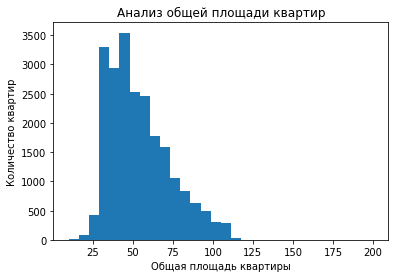

Наибольшие по площади варианты:
12991    112.0
18157    112.0
15911    112.0
13212    112.0
7332     112.0
23105    112.0
12645    112.0
16230    112.0
21125    112.0
22175    112.0
10393    112.0
17929    112.0
22667    112.0
7620     112.0
6329     112.0
3711     112.0
22779    112.0
8099     112.0
19065    112.0
4469     112.0
Name: total_area, dtype: float64


In [45]:
# Рассмотрим площади квартир. Определим самые большие по площади квартиры. Построим гистограмму
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Анализ общей площади квартир')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(20))

`Видим, что большинство квартир имеют площадь от 30 до 60 кв.м. Выше анализировали,что большие квартиры имеют большое количество комнат и аномальных явлений здесь нет`

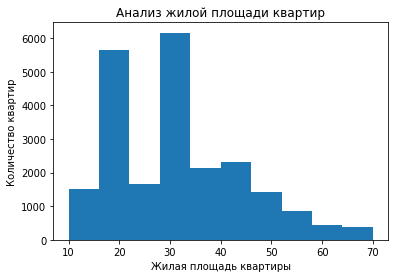

Наибольшие по площади варианты:
11790    73.0
2324     73.0
18770    73.0
10068    73.0
22938    73.0
4561     73.0
7204     73.0
6369     73.0
17727    73.0
3375     73.0
213      73.0
20750    73.0
3174     73.0
107      73.0
1492     73.0
23221    73.0
23113    73.0
13546    73.0
15616    73.0
19868    73.0
Name: living_area, dtype: float64


In [46]:
# Рассмотрим жилые площади квартир. Построим гистограмму
plt.hist(data['living_area'], bins=10, range=(10,70))
plt.title('Анализ жилой площади квартир')
plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(20))

`Видно по гистограмме,что люди продают квартиры с жилой площадью от 15 до 50 кв.м. Квартир с большей жилой площадью мало. Пики графика,скорее всего, показывают данные для 1-комнатной квартиры, затем 2-комн.квартиры и, следовательно, для 3-комн.кв.`

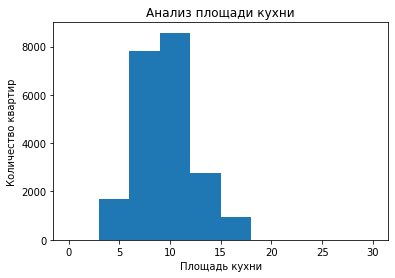

Наибольшие по площади кухни варианты:
17008    16.0
11209    16.0
13556    16.0
14908    16.0
15781    16.0
6981     16.0
4829     16.0
12162    16.0
21536    16.0
21534    16.0
Name: kitchen_area, dtype: float64


In [47]:
# Посмотрим на площади кухонь, построим гистограмму
plt.hist(data['kitchen_area'], bins=10, range=(0,30))
plt.title('Анализ площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))


`Большинство кухонь имеют площадь от 5 до 15 кв.м. Кухни с площадью больше 20 кв.м. очень мало, что соответствует действительности. Но как видим из данных, редко встречаются большие площади`

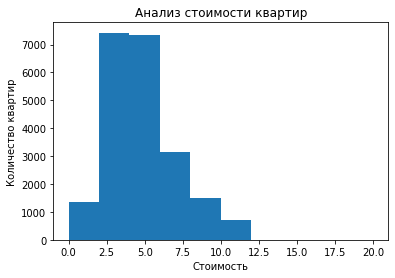

Наибольшие по цене варианты:
3165     11.86686
21860    11.85800
12437    11.85000
10068    11.84000
19454    11.82000
20193    11.80967
17488    11.80000
9407     11.80000
22326    11.80000
2267     11.80000
4973     11.80000
3396     11.80000
2507     11.80000
3642     11.80000
7373     11.80000
5179     11.80000
21547    11.80000
14422    11.80000
52       11.79500
7960     11.79300
Name: last_price, dtype: float64


In [48]:
# Для лучшего понятия и вида разделим стоимость на 1 млн. и приведем в целочисленный вид
data['last_price']=(data['last_price']/1000000)
# Рассмотрим стоимость квартир. Определим самые дорогие. Построим гистограмму
plt.hist(data['last_price'], bins=10, range=(0,20))
plt.title('Анализ стоимости квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(20))

`Судя по гистограмме, основная часть квартир стоит от 3 до 7 миллионов. Но есть варианты стоимостью больше 20 миллионов.`

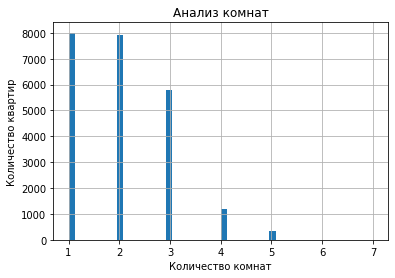

Наибольшие по числу комнат варианты:
18447    5
5518     5
23305    5
13139    5
335      5
7799     5
2137     5
3267     5
11018    5
10474    5
Name: rooms, dtype: int64


In [49]:
# Проанализируем комнаты, построим гистрограмму
data['rooms'].hist(bins=50,range=(1,7))
#plt.hist(data['rooms'], bins=5, range=(1,7))
plt.title('Анализ комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))



`Гистограмма рассказывает нам, что большая часть встречающихся квартир - это квартиры с 1, 2 и 3 комнатами. И чаще всего продаются 1 и 2-комн.квартиры. Есть немного 4-комнатных квартир. Но есть и варианты квартир с 5, 6 и 7 комнатами. Как мы рассмотрели ранее, оказывается есть такие квартиры в Санкт_петербурге с большой площадью и имеющие большое количество комнат.`

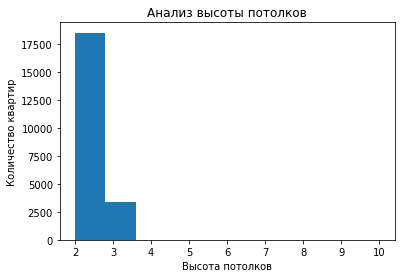

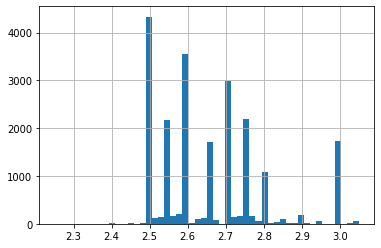

In [50]:
# Проверим высоту потолков, так как ранее мы обнаружили,что там есть аномально большие значения. Построим гистограмму
#plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.hist(data['ceiling_height'], bins=10, range=(2,10))
plt.title('Анализ высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()
# Данные без выбросов
data.query('ceiling_height >= 2.0 and ceiling_height <= 4.0')['ceiling_height'].hist(bins=50)
plt.show()


`Большая часть квартир имеют высоту потолков от 2,2 до 3,7 метров.`

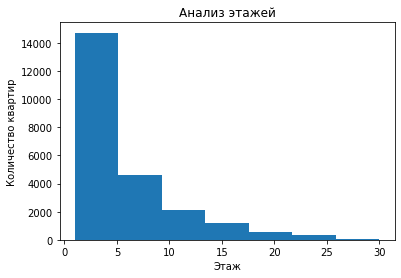

Самые высокие этажи:
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
12888    27
16644    27
23292    27
4091     27
Name: floor, dtype: int64


In [51]:
# Проанализируем этажи. Построим гистрограмму
plt.hist(data['floor'], bins=7, range=(1,30))
plt.title('Анализ этажей')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Самые высокие этажи:')
print(data['floor'].sort_values(ascending=False).head(10))




`Из графика видно,что продают зачастую и квартиры с 1 по 5 этажи, чуть меньше с 6 по 15 эт.`

In [52]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day,month,year,floor_type,living_area_ratio,center_km
0,20,NaN,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,NaN,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN,93225.806452,7,3,2019,другой,47,16
1,7,3.350,40.0,2018-12-04,1,2.65,11,18.0,1,False,False,False,11.0,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0,83750.000000,4,12,2018,первый,45,18
2,10,5.196,56.0,2015-08-20,2,2.60,5,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,NaN,92785.714286,20,8,2015,другой,60,13
3,0,NaN,NaN,2015-07-24,3,2.60,14,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0,93225.806452,24,7,2015,другой,0,6
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,NaN,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0,100000.000000,19,6,2018,другой,32,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,NaN,2017-03-21,3,NaN,5,73.0,3,False,False,False,13.0,0,Санкт-Петербург,24665000.0,4232.0,1,796000.0,3,381000.0,NaN,93225.806452,21,3,2017,другой,0,4
23695,14,3.100,59.0,2018-01-15,3,2.50,5,38.0,4,False,False,False,8.0,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.372881,15,1,2018,другой,64,0
23696,18,2.500,56.0,2018-02-11,2,2.65,3,29.0,1,False,False,False,9.0,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44642.857143,11,2,2018,первый,51,0
23697,13,11.475,76.0,2017-03-28,2,3.00,17,30.0,12,False,False,False,NaN,2,Санкт-Петербург,39140000.0,10364.0,2,173000.0,3,196000.0,NaN,150986.842105,28,3,2017,другой,39,10


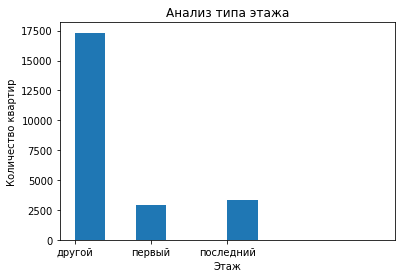

Больше этажей:
6813     последний
17303    последний
3054     последний
8675     последний
17284    последний
3060     последний
3063     последний
8669     последний
3067     последний
17290    последний
Name: floor_type, dtype: object


In [53]:
# Проанализируем этажность. Построим гистрограмму
plt.hist(data['floor_type'], bins=10, range=(0,4))
plt.title('Анализ типа этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Больше этажей:')
print(data['floor_type'].sort_values(ascending=False).head(10))




`Как видно из графика, покупатели и продавцы предпочитают другие этажи, нежели первые и последние. 1 эт. и последний этаж по продажам приблизительно равны.`

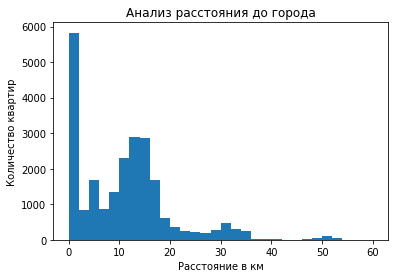

Максимальное расстояние:
577      65
9640     65
5340     65
20746    65
5218     64
2974     62
18884    62
16569    61
23123    60
4441     59
Name: center_km, dtype: int64


In [54]:
# Проанализируем расстояние до города, построим гистрограмму
#data['center_km'].hist(bins=50,range=(1,7))
plt.hist(data['center_km'], bins=30, range=(0,60))
plt.title('Анализ расстояния до города')
plt.xlabel('Расстояние в км')
plt.ylabel('Количество квартир')
plt.show()
print('Максимальное расстояние:')
print(data['center_km'].sort_values(ascending=False).head(10))

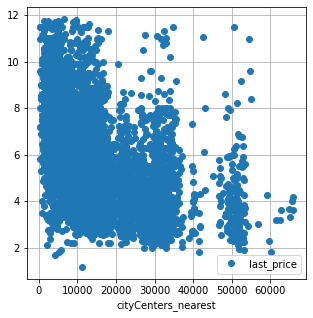

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.711523
last_price                      0.711523    1.000000 



In [55]:
# Определим дополнительно зависимость цены last_price от удалённости от центра города cityCenters_nearest
(
    data.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

`Большое скопление продаваемых квартир ближе к центру на расстоянии до 18 км. Максимальное число покупаемых квартир собрано в радиусе до 5-7 км. А цена к центру повышается!`

In [56]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day,month,year,floor_type,living_area_ratio,center_km
0,20,NaN,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,NaN,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN,93225.806452,7,3,2019,другой,47,16
1,7,3.350,40.0,2018-12-04,1,2.65,11,18.0,1,False,False,False,11.0,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0,83750.000000,4,12,2018,первый,45,18
2,10,5.196,56.0,2015-08-20,2,2.60,5,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,NaN,92785.714286,20,8,2015,другой,60,13
3,0,NaN,NaN,2015-07-24,3,2.60,14,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0,93225.806452,24,7,2015,другой,0,6
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,NaN,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0,100000.000000,19,6,2018,другой,32,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,NaN,2017-03-21,3,NaN,5,73.0,3,False,False,False,13.0,0,Санкт-Петербург,24665000.0,4232.0,1,796000.0,3,381000.0,NaN,93225.806452,21,3,2017,другой,0,4
23695,14,3.100,59.0,2018-01-15,3,2.50,5,38.0,4,False,False,False,8.0,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.372881,15,1,2018,другой,64,0
23696,18,2.500,56.0,2018-02-11,2,2.65,3,29.0,1,False,False,False,9.0,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44642.857143,11,2,2018,первый,51,0
23697,13,11.475,76.0,2017-03-28,2,3.00,17,30.0,12,False,False,False,NaN,2,Санкт-Петербург,39140000.0,10364.0,2,173000.0,3,196000.0,NaN,150986.842105,28,3,2017,другой,39,10


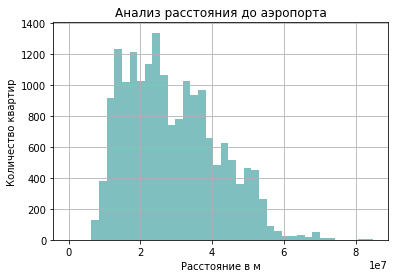

In [57]:
data.hist(column = 'airports_nearest', bins = 40, color = 'teal', \
           alpha = 0.5)
plt.title('Анализ расстояния до аэропорта')
plt.xlabel('Расстояние в м')
plt.ylabel('Количество квартир')
plt.show()

`Расстояние до аэропорта от квартир варьируется от 10 км до 50 км. Большая часть продаваемых квартир находятся на расстоянии до 30 км. до аэропорта.`

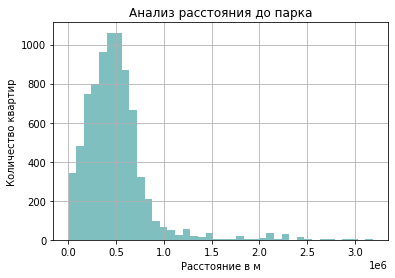

In [58]:
data.hist(column = 'parks_nearest', bins = 40, color = 'teal', \
           alpha = 0.5)
plt.title('Анализ расстояния до парка')
plt.xlabel('Расстояние в м')
plt.ylabel('Количество квартир')
plt.show()

`Анализ показывает,что большая часть продаваемых квартир находится недалеко от парков, на расстоянии до 1 км.`

In [59]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day,month,year,floor_type,living_area_ratio,center_km
0,20,NaN,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,NaN,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN,93225.806452,7,3,2019,другой,47,16
1,7,3.350,40.0,2018-12-04,1,2.65,11,18.0,1,False,False,False,11.0,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0,83750.000000,4,12,2018,первый,45,18
2,10,5.196,56.0,2015-08-20,2,2.60,5,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,NaN,92785.714286,20,8,2015,другой,60,13
3,0,NaN,NaN,2015-07-24,3,2.60,14,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0,93225.806452,24,7,2015,другой,0,6
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,NaN,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0,100000.000000,19,6,2018,другой,32,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,NaN,2017-03-21,3,NaN,5,73.0,3,False,False,False,13.0,0,Санкт-Петербург,24665000.0,4232.0,1,796000.0,3,381000.0,NaN,93225.806452,21,3,2017,другой,0,4
23695,14,3.100,59.0,2018-01-15,3,2.50,5,38.0,4,False,False,False,8.0,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.372881,15,1,2018,другой,64,0
23696,18,2.500,56.0,2018-02-11,2,2.65,3,29.0,1,False,False,False,9.0,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44642.857143,11,2,2018,первый,51,0
23697,13,11.475,76.0,2017-03-28,2,3.00,17,30.0,12,False,False,False,NaN,2,Санкт-Петербург,39140000.0,10364.0,2,173000.0,3,196000.0,NaN,150986.842105,28,3,2017,другой,39,10


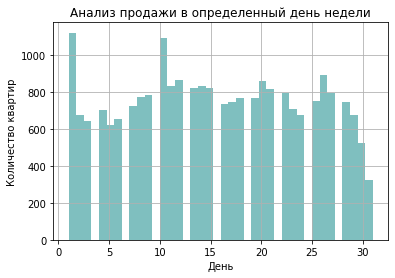

In [60]:
data.hist(column = 'day', bins = 40, color = 'teal', \
           alpha = 0.5)
plt.title('Анализ продажи в определенный день недели')
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show()

`Продажа квартир идет приблизительно одинаково во все дни месяца. Первый день и 15-й день особенно выделяются, скорее всего из-за манипуляций с документами,которые требуют выдержки необходимого срока и офиц.проверок.`

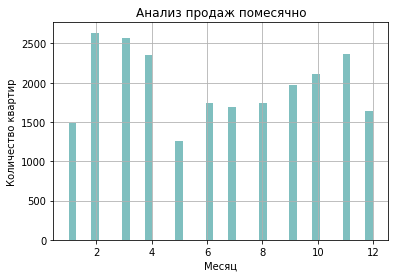

In [61]:
data.hist(column = 'month', bins = 40, color = 'teal', \
           alpha = 0.5)
plt.title('Анализ продаж помесячно')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

`Из графика видно,что с февраля по апрель и с октября по ноябрь продажи квартир идут активнее. В летние месяцы сказываются отпуска и отдых, а зимой мы распределяем бюджет на подарки к новому году. Поэтому в этот период продажи падают.`

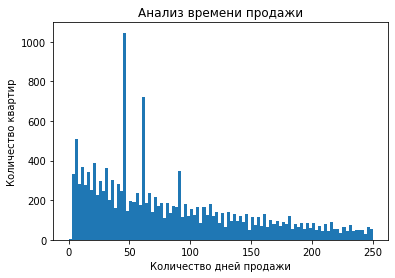

Наибольшее время продаж:
15885    509.0
14284    509.0
3313     509.0
3174     509.0
20792    509.0
8730     509.0
12500    509.0
367      508.0
20337    508.0
3576     508.0
Name: days_exposition, dtype: float64


count    18721.000000
mean       128.299343
std        121.064671
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        509.000000
Name: days_exposition, dtype: float64

In [62]:
# Гистограма времени продажи
plt.hist(data['days_exposition'], bins=100, range=(0,250))
plt.title('Анализ времени продажи')
plt.xlabel('Количество дней продажи')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшее время продаж:')
print(data['days_exposition'].sort_values(ascending=False).head(10))
data['days_exposition'].describe()


`Медианное время продажи - 95 дней. Среднее время продажи - 180 дней.
В основном квартиры продаются за срок до 80 дней. Пики на графике показывают, вероятно, продажи максим. сроки 1,2,3-комн.квартир соответственно. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько месяцев.
Быстрая продажа возможна в срок до 20 дней. Долгой продажей оказался период в 250дней, это около 8 мес.!.`

In [63]:
data.head(50)
         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day,month,year,floor_type,living_area_ratio,center_km
0,20,NaN,108.0,2019-03-07,3,2.700,16,51.0,8,False,False,False,NaN,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN,93225.806452,7,3,2019,другой,47,16
1,7,3.350,40.0,2018-12-04,1,2.650,11,18.0,1,False,False,False,11.0,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0,83750.000000,4,12,2018,первый,45,18
2,10,5.196,56.0,2015-08-20,2,2.600,5,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,NaN,92785.714286,20,8,2015,другой,60,13
3,0,NaN,NaN,2015-07-24,3,2.600,14,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0,93225.806452,24,7,2015,другой,0,6
4,2,10.000,100.0,2018-06-19,2,3.030,14,32.0,13,False,False,False,NaN,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0,100000.000000,19,6,2018,другой,32,8
5,10,2.890,30.0,2018-09-10,1,2.625,12,14.0,5,False,False,False,9.0,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,96333.333333,10,9,2018,другой,46,0
6,6,3.700,37.0,2017-11-02,1,2.600,26,10.0,6,False,False,False,14.0,1,поселок Парголово,52996000.0,19143.0,0,NaN,0,NaN,155.0,100000.000000,2,11,2017,другой,27,19
7,5,7.915,71.0,2019-04-18,2,2.750,24,30.0,22,False,False,False,NaN,2,Санкт-Петербург,23982000.0,11634.0,0,NaN,0,NaN,NaN,111478.873239,18,4,2019,другой,42,11
8,20,2.900,33.0,2018-05-23,1,2.650,27,15.0,26,False,False,False,8.0,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87878.787879,23,5,2018,другой,45,0
9,18,5.400,61.0,2017-02-26,3,2.500,9,43.0,7,False,False,False,6.0,2,Санкт-Петербург,50898000.0,15008.0,0,NaN,0,NaN,289.0,88524.590164,26,2,2017,другой,70,15


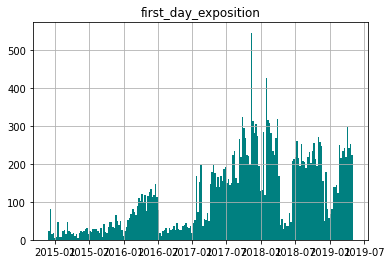

In [64]:
data.hist(column = 'first_day_exposition', bins = 200, color = 'teal', \
           alpha = 1.0)

plt.show()

`Судя по графику, большой ажиотаж на покупку кварртиры пришелся на период с февраля 2017 по июль 2019`

### Определение факторов, влияющих на стоимость квартиры

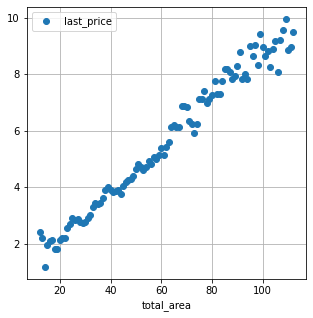

Корреляция цены и общей площади: 

            last_price  total_area
last_price    1.000000    0.906755
total_area    0.906755    1.000000 



In [65]:
# Определим зависимость цены last_price от общей площади total_area
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и общей площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')



`Как видим из графика: чем больше общая площадь квартиры, тем цена выше. Корреляция этих параметров высокая.Точки распределились плотно на значениях площади с 20 до 60 кв.м. Возможно, именно их чаще всего и покупают. Меньше всего покупаются квартиры от 100 кв.м., эти квартиры и дороже.`

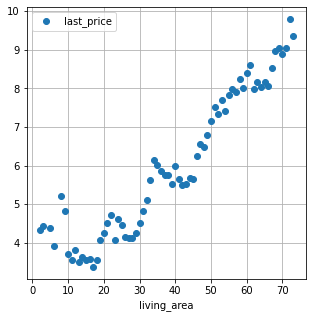

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.737825
living_area    0.737825     1.000000 



In [66]:
# Определим зависимость цены last_price от общей площади living_area
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')


`График схож с графиком зависимости цены от общей площади. Это неудивительно, ведь, жилая площадь-это основа квартиры.`

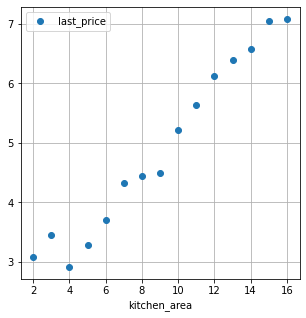

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area       1.00000     0.81907
last_price         0.81907     1.00000 



In [67]:
# Определим зависимость цены last_price от площади кухни kitchen_area
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

`Зависимость показывает,что с увеличением кухни цена повышается совсем чуть-чуть.`

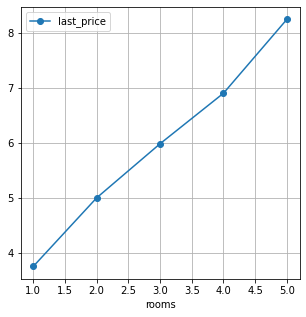

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.537024
rooms         0.537024  1.000000 



In [68]:
# Определим зависимость цены last_price от числа комнат rooms
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')



`Видим, что число комнат влияет на цену. Чем больше комнат, соответственно, тем больше цена на квартиру. Но зависимость ниже, чем у данных с площадью квартир. В реальности знаем, что встречаются квартиры с большими по площади комнатами. А еще учитывать нужно,что в центре города квартиры имеют малое число комнат, но стоимость подобных квартир высока.`

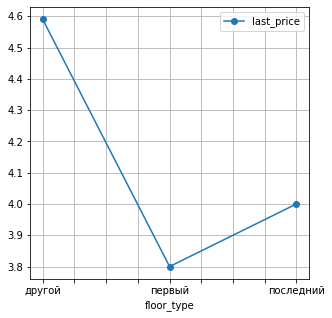

In [69]:
# Определим зависимость цены last_price от этажа floor_type
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

`Конечно, многие люди охотнее выбирают квартиры между 1 и последними этажами. Это подтверждает нам и график заисимости цены и этажа. Причем, больше всего покупаются квартиры с другим этажом. Но если выбор небольшой, а купить уже нужно, то небольшая доля покупок приходится на последний этаж. Зависимость очень большая.`

In [70]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day,month,year,floor_type,living_area_ratio,center_km
0,20,NaN,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,NaN,0,Санкт-Петербург,18863000.0,16028.0,1,482000.0,2,755000.0,NaN,93225.806452,7,3,2019,другой,47,16
1,7,3.350,40.0,2018-12-04,1,2.65,11,18.0,1,False,False,False,11.0,2,поселок Шушары,12817000.0,18603.0,0,NaN,0,NaN,81.0,83750.000000,4,12,2018,первый,45,18
2,10,5.196,56.0,2015-08-20,2,2.60,5,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741000.0,13933.0,1,90000.0,2,574000.0,NaN,92785.714286,20,8,2015,другой,60,13
3,0,NaN,NaN,2015-07-24,3,2.60,14,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098000.0,6800.0,2,84000.0,3,234000.0,424.0,93225.806452,24,7,2015,другой,0,6
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,NaN,0,Санкт-Петербург,31856000.0,8098.0,2,112000.0,1,48000.0,121.0,100000.000000,19,6,2018,другой,32,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,NaN,2017-03-21,3,NaN,5,73.0,3,False,False,False,13.0,0,Санкт-Петербург,24665000.0,4232.0,1,796000.0,3,381000.0,NaN,93225.806452,21,3,2017,другой,0,4
23695,14,3.100,59.0,2018-01-15,3,2.50,5,38.0,4,False,False,False,8.0,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.372881,15,1,2018,другой,64,0
23696,18,2.500,56.0,2018-02-11,2,2.65,3,29.0,1,False,False,False,9.0,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44642.857143,11,2,2018,первый,51,0
23697,13,11.475,76.0,2017-03-28,2,3.00,17,30.0,12,False,False,False,NaN,2,Санкт-Петербург,39140000.0,10364.0,2,173000.0,3,196000.0,NaN,150986.842105,28,3,2017,другой,39,10


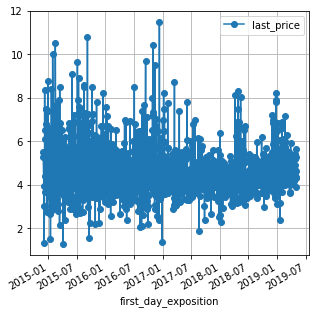

In [71]:
# Определим зависимость цены last_price от day,month,year
(
    data.pivot_table(index='first_day_exposition', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

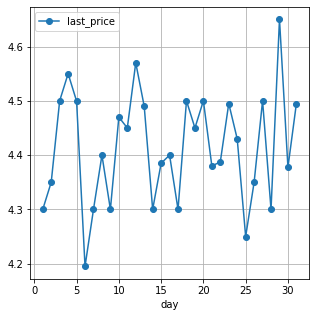

In [72]:
# Определим зависимость цены last_price от day,month,year
(
    data.pivot_table(index='day', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

`График показывает каждодневные скачки цен на квартиры.`

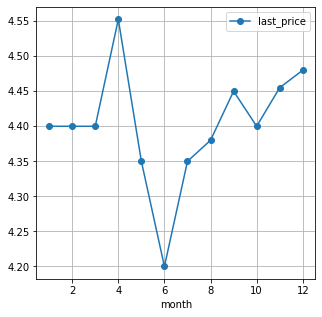

In [73]:
# Определим зависимость цены last_price от month
(
    data.pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

`Ранее гистограмма показала рост продаж в марте-мае и октябре-ноябре. Сейчас график зависимости цены показывает,что цены в эти периоды стремятся вверх. А в период отпусков цены падают.`

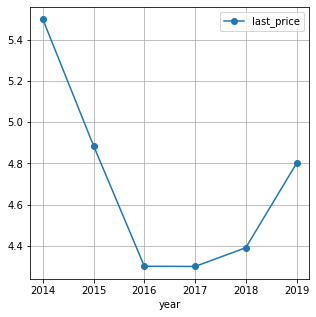

In [74]:
# Определим зависимость цены last_price от day,month,year
(
    data.pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

`Судя по графику, пик продаж за анализируемый период пришелся на 2014 год. Затем продажи резко падать до 2016 года. Причины могут быть самые разные, как и общая обстановка в стране. С 2017 г. продажи квартир стабилизировались и пошли в рост.`

In [75]:
# Посчитаем среднюю цену 1 кв.м. в 10 населённых пунктах с наибольшим числом объявлений. 
# Выделим населённые пункты с самой высокой и низкой стоимостью кв.м. 
# Сравним среднюю стоимость кв.м. в топ-10 городов по числу объявлений

# Для начала посмотрим на нашу "горячую десятку"
top_ten_city = data['locality_name'].value_counts().head(10)
print(top_ten_city)

Санкт-Петербург      15651
поселок Мурино         552
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


In [76]:
price_top_ten = data.query('locality_name in (@top_ten_city.index)').pivot_table(values='price_one_meter', index='locality_name')
# сразу приведем к целочисленному типу
price_top_ten = price_top_ten.astype(int)
# отсортируем
price_top_ten.sort_values('price_one_meter', ascending=False)

,price_one_meter
locality_name,
Санкт-Петербург,104478
Пушкин,100270
деревня Кудрово,92939
поселок Парголово,90840
поселок Мурино,86254
поселок Шушары,79069
Колпино,75692
Гатчина,69282
Всеволожск,67809


`Самая большая средняя стоимость 1 кв.м. в Санкт-Петербурге. Не удивительно! Второе место занимает Пушкин. Остальные населенные пункты находятся недалеко от Санкт-Петербурга, соответственно, и стоимость за 1 кв.м. тоже поднимается в рейтинге. Завершают наш топ-10 Всеволожск и Выборг. Гугл говорит, что они  находятся дальше от северной столицы, поэтому и цена меньше.`

In [77]:
# Ранее вы посчитали расстояние до центра в километрах. 
# Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. 
# Опишите, как стоимость объектов зависит от расстояния до центра города

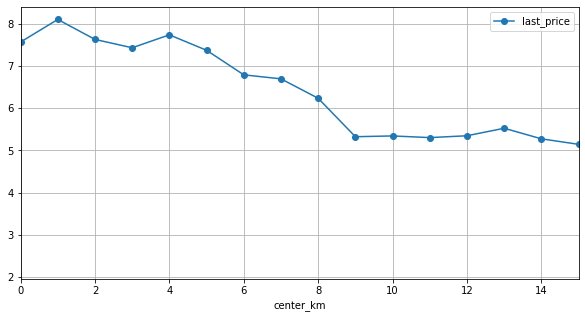

In [78]:
# Вернемся к таблице, вспомним столбец cityCenters_nearest
data


# Добавим столбец с расстоянием до центра в км, приведем в целочисленное значение
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
# Выберем Санкт-Петербург, как самый дорогой город из топа. Взглянем на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

`Дорогая зона - это центральная, до 6-7 км. Чем дальше от данной зоны, тем цена снижается.`

### Общий вывод

Итак, исходя из анализа данных таблицы можно сделать выводы:
- Большим спросом пользуются квартиры недалеко от центра города. На аэропорты покупатели тоже обращают небольшое внимание, но так как город большой, то и аэропорт должен быть недалеко.
- Чаще всего квартиру продают за 80 дней. Если меньше 30 дней, то это быстро, если дольше 230 дней - это долго. Но есть небольшое число квартир, проданных всего за несколько дней после публикации.
- На стоимость квартиры больше влияет ее площадь, а не число комнат. Могут быть дорогие квартиры с малым числом комнат, но комнаты большие.Так же на стоимость квартиры не особо влиет площадь кухни. цены в том анализе увеличиваются ненамного.
- Пик продаж приходится на периоды года март-май и октябрь-ноябрь. В это время, соответственно, растут и цены на недвижимость. В остальные месяцы рост и продажи падают.
- Первый этаж значительно дешевле, чем последний этаж и промежуточные. Но на последних этажах цены тоже невысокие. Дороже квартиры, соответственно, на промежуточных этажах между 1 и последним.
- Самый дорогой квадратный метр в Санкт-Петербурге - 114848, а самый дешевый - в Выборге, 58141.